In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif

In [3]:
%config IPCpmpleter.greedy=True

In [2]:
train = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [3]:
test = pd.read_csv('Data Mining VU data/test_set_VU_DM_2014.csv')

In [9]:
# smaller samples for faster exploration
train_sample = train.sample(frac=0.1, random_state=0)
test_sample = train.drop(train_sample.index)

In [12]:
float(train_sample.booking_bool.sum())/train_sample.shape[0]

0.027716881623927315

In [13]:
float(train.booking_bool.sum())/train.shape[0]

0.027910511305481445

In [14]:
float(train.click_bool.sum())/train.shape[0]

0.04474858254172207

In [15]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [145]:
train[['prop_location_score1','prop_location_score2', 'price_usd']].describe()

,prop_location_score1,prop_location_score2,price_usd
count,4.958347e+06,3.867999e+06,4.958347e+06
mean,2.872589e+00,1.303852e-01,2.542096e+02
std,1.531011e+00,1.594634e-01,1.600124e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.790000e+00,1.900000e-02,8.500000e+01
50%,2.770000e+00,6.900000e-02,1.220000e+02
75%,4.040000e+00,1.805000e-01,1.849600e+02
max,6.980000e+00,1.000000e+00,1.972633e+07


In [17]:
len(train.position.unique())

40

In [18]:
# number of different users
print(len(train.srch_id.unique()), len(test.srch_id.unique()))

(199795, 199549)


In [19]:
# numbers of different hotels
print(len(train.prop_id.unique()), len(test.prop_id.unique()))

(129438, 129438)


In [20]:
# check if test set contains other hotels than the training set
test_ids = set(test.prop_id.unique())
train_ids = set(train.prop_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' hotels in the test set overlap with the training set')

(121665, ' of ', 129438, ' hotels in the test set overlap with the training set')


In [8]:
121665/129438

0.9399480832522135

In [21]:
# check if test set contains other users than the training set
test_ids = set(test.srch_id.unique())
train_ids = set(train.srch_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' users in the test set overlap with the training set')

(119914, ' of ', 199549, ' users in the test set overlap with the training set')


In [22]:
# check if test set contains other site_ids than the training set
test_ids = set(test.site_id.unique())
train_ids = set(train.site_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' site_ids in the test set overlap with the training set')

(34, ' of ', 34, ' site_ids in the test set overlap with the training set')


In [23]:
# check if test set contains other visitor_location_country_ids than the training set
test_ids = set(test.visitor_location_country_id.unique())
train_ids = set(train.visitor_location_country_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' countries in the test set overlap with the training set')

(202, ' of ', 210, ' countries in the test set overlap with the training set')


In [24]:
numerical_features = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']

In [25]:
train.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [26]:
train.isna().sum()/train.shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [27]:
# for booked hotels the ratio of missing values for hotel properties (prop_review_score, prop_location_score2) is significantly lower
# --> replace missing hotel properties by 'bad' values
train[train.booking_bool==1].isna().sum()/train[train.booking_bool==1].shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.934331
visitor_hist_adr_usd           0.933998
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.000838
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.104588
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.921345


# Distributions

/Users/Tamika/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


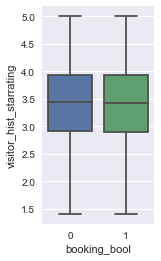

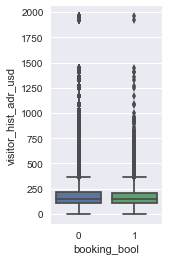

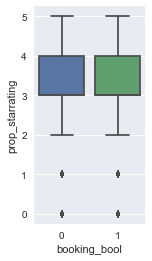

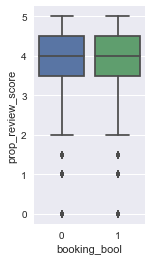

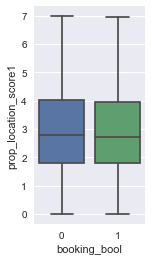

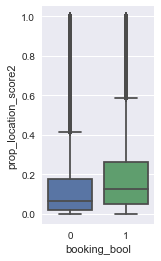

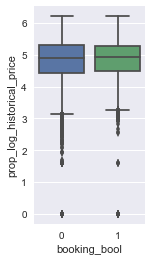

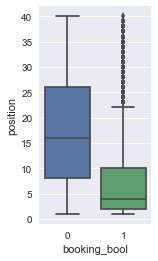

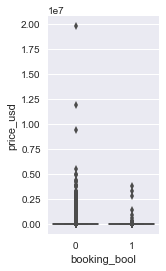

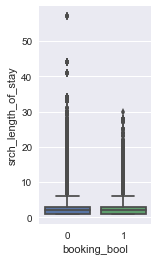

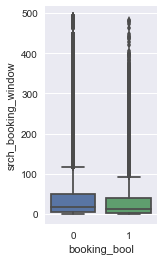

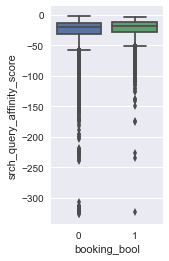

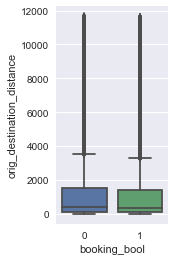

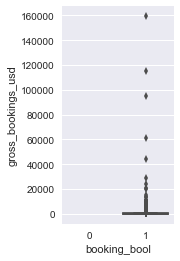

In [29]:
for feature in ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','srch_length_of_stay','srch_booking_window','srch_query_affinity_score','orig_destination_distance','gross_bookings_usd']:
    plt.figure(figsize=(2,4))
    sns.boxplot(x='booking_bool', y=feature, data=train)
    #plt.savefig("output/distribution_%s.pdf" %feature, bbox_inches='tight')
    plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


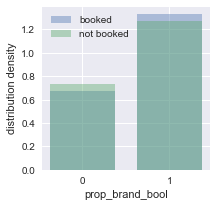

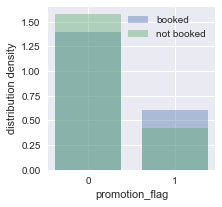

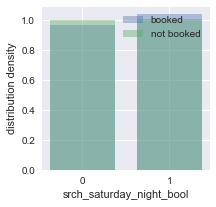

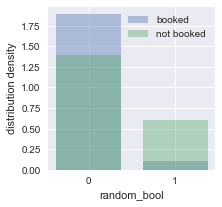

In [61]:
sns.set(style="darkgrid")
for feature in ['prop_brand_bool','promotion_flag','srch_saturday_night_bool','random_bool']:
    plt.figure(figsize=(3,3))
    ax1 = sns.distplot(train[feature][train.booking_bool==1], label='booked', kde=False, norm_hist=True, bins=len(train[feature].unique()), hist_kws={"rwidth":0.75})
    ax2 = sns.distplot(train[feature][train.booking_bool==0], label='not booked', kde=False, norm_hist=True, bins=len(train[feature].unique()), hist_kws={"rwidth":0.75})
    plt.xticks([0.25,0.75],[0,1])
    #ax2.set_xticks([0.25,0.75],[0,1])
    plt.legend()
    plt.ylabel('distribution density')
    plt.savefig("output/distribution2_%s.pdf" %feature, bbox_inches='tight')
    plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


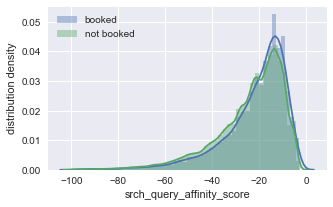

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,3))
sns.distplot(train.srch_query_affinity_score[train.booking_bool==1][train.srch_query_affinity_score>-100].dropna(), label='booked')
sns.distplot(train.srch_query_affinity_score[train.booking_bool==0][train.srch_query_affinity_score>-100].dropna(), label='not booked')
plt.legend()
plt.ylabel('distribution density')
plt.savefig("output/distribution3_srch_query_affinity_score.pdf", bbox_inches='tight')
plt.show()

In [11]:
train['srch_query_affinity_bins'] = pd.cut(train.srch_query_affinity_score.apply(lambda x: x if x >= -100 else -100), 5)
train[['srch_query_affinity_bins','booking_bool']].groupby(['srch_query_affinity_bins'], as_index=False).mean().sort_values(by='srch_query_affinity_bins',ascending=True)

,srch_query_affinity_bins,booking_bool
0,"(-100.098, -80.499]",0.027475
1,"(-80.499, -60.998]",0.027935
2,"(-60.998, -41.496]",0.025806
3,"(-41.496, -21.995]",0.029319
4,"(-21.995, -2.494]",0.038975


c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


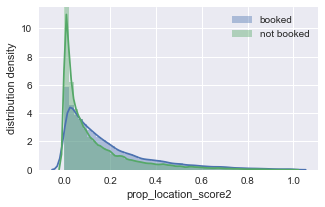

In [63]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,3))
sns.distplot(train.prop_location_score2[train.booking_bool==1].dropna(), label='booked')
sns.distplot(train.prop_location_score2[train.booking_bool==0].dropna(), label='not booked')
plt.legend()
plt.ylabel('distribution density')
plt.savefig("output/distribution3_prop_location_score2.pdf", bbox_inches='tight')
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


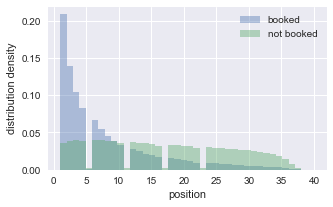

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,3))
sns.distplot(train.position[train.booking_bool==1].dropna(), label='booked', bins=40, kde=False, norm_hist=True)
sns.distplot(train.position[train.booking_bool==0].dropna(), label='not booked', bins=40, kde=False, norm_hist=True)
plt.legend()
plt.ylabel('distribution density')
plt.savefig("output/distribution3_position.pdf", bbox_inches='tight')
plt.show()

# Correlations 

### All instances 

visitor_hist_starrating     -0.002044
visitor_hist_adr_usd         0.000602
prop_starrating              0.021206
prop_review_score            0.025800
prop_brand_bool              0.009991
prop_location_score1        -0.003273
prop_location_score2         0.066405
prop_log_historical_price   -0.000807
position                    -0.147918
price_usd                    0.000067
promotion_flag               0.036047
srch_length_of_stay         -0.024412
srch_booking_window         -0.019582
srch_adults_count           -0.005376
srch_children_count          0.003872
srch_room_count              0.007948
srch_saturday_night_bool     0.005478
srch_query_affinity_score    0.025524
orig_destination_distance   -0.003687
random_bool                 -0.088891
click_bool                   0.782889
gross_bookings_usd                NaN
booking_bool                 1.000000
Name: booking_bool, dtype: float64
visitor_hist_starrating      0.002541
visitor_hist_adr_usd         0.003858
prop_starrating

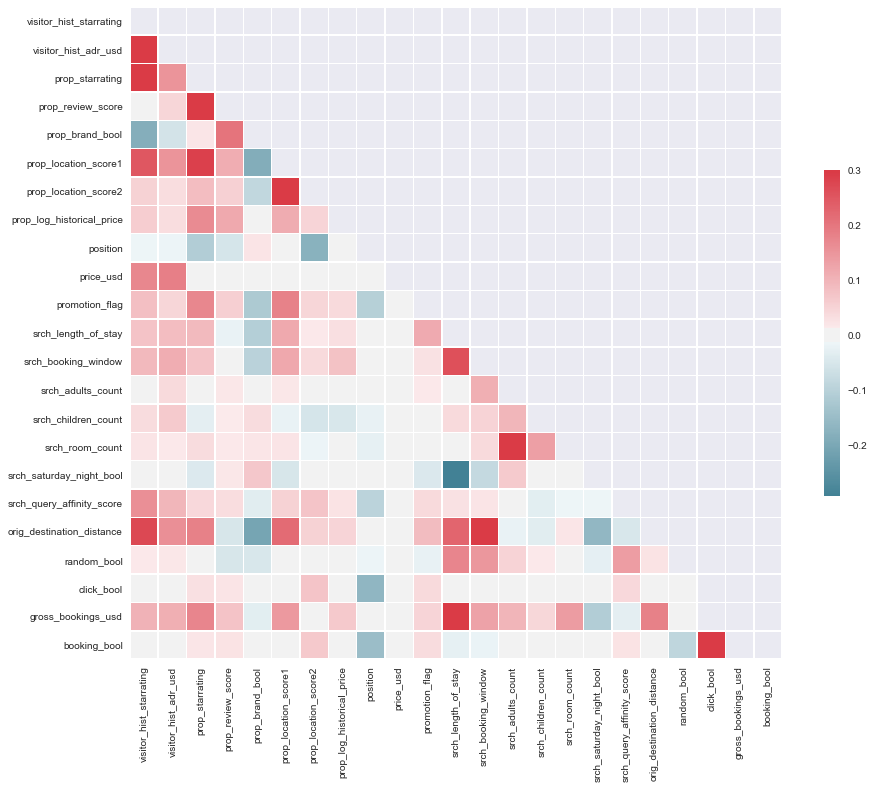

In [121]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','click_bool','gross_bookings_usd','booking_bool']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print(corr.booking_bool)
print(corr.click_bool)
print(corr.prop_location_score1)
print(corr.position)

,visitor_hist_starrating,visitor_hist_adr_usd,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance
visitor_hist_starrating,1.000000,0.498618,0.077293,0.092211,-0.011558,0.036969,0.023669,0.273962
visitor_hist_adr_usd,0.498618,1.000000,0.085236,0.111427,0.039195,0.064613,0.015631,0.159176
srch_length_of_stay,0.077293,0.085236,1.000000,0.262616,0.011260,0.038336,0.002111,0.227805
srch_booking_window,0.092211,0.111427,0.262616,1.000000,0.110007,0.052099,0.039504,0.321485
srch_adults_count,-0.011558,0.039195,0.011260,0.110007,1.000000,0.096640,0.471428,-0.020818
srch_children_count,0.036969,0.064613,0.038336,0.052099,0.096640,1.000000,0.135387,-0.034837
srch_room_count,0.023669,0.015631,0.002111,0.039504,0.471428,0.135387,1.000000,0.020720
orig_destination_distance,0.273962,0.159176,0.227805,0.321485,-0.020818,-0.034837,0.020720,1.000000


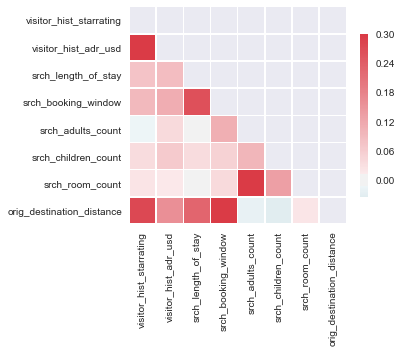

In [66]:
# ONLY USER FEATURES
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','orig_destination_distance']
# Compute the correlation matrix
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.savefig("output/corr_user_features.pdf", bbox_inches='tight')
corr

,prop_starrating,prop_review_score,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd
prop_starrating,1.000000,0.306454,0.287322,0.086325,0.167723,-0.107717,0.007770
prop_review_score,0.306454,1.000000,0.111115,0.055063,0.118993,-0.053983,0.001397
prop_location_score1,0.287322,0.111115,1.000000,0.435983,0.113209,0.003340,0.003369
prop_location_score2,0.086325,0.055063,0.435983,1.000000,0.049256,-0.174955,-0.000144
prop_log_historical_price,0.167723,0.118993,0.113209,0.049256,1.000000,-0.008703,-0.000620
position,-0.107717,-0.053983,0.003340,-0.174955,-0.008703,1.000000,-0.001880
price_usd,0.007770,0.001397,0.003369,-0.000144,-0.000620,-0.001880,1.000000


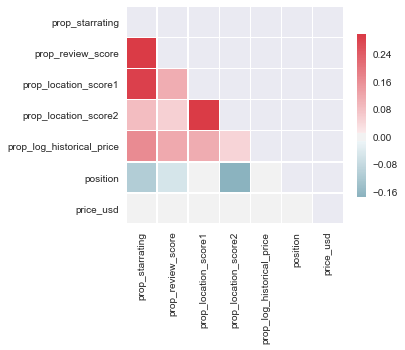

In [59]:
# ONLY HOTEL FEATURES
numerical_data_of_interest = ['prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.savefig("output/corr_hotel_features.pdf", bbox_inches='tight')
corr

### Booked instances only

visitor_hist_starrating      0.277233
visitor_hist_adr_usd         0.173925
prop_starrating              0.288499
prop_review_score            0.075392
prop_brand_bool             -0.181403
prop_location_score1         1.000000
prop_location_score2         0.168314
prop_log_historical_price    0.107982
position                     0.114018
price_usd                    0.002380
promotion_flag               0.177769
srch_length_of_stay          0.150686
srch_booking_window          0.112825
srch_adults_count            0.004435
srch_children_count         -0.016209
srch_room_count              0.031717
srch_saturday_night_bool    -0.051930
srch_query_affinity_score    0.011123
orig_destination_distance    0.224416
random_bool                 -0.021797
gross_bookings_usd           0.142669
Name: prop_location_score1, dtype: float64
                           visitor_hist_starrating  visitor_hist_adr_usd  \
visitor_hist_starrating                   1.000000              0.506662   
visitor

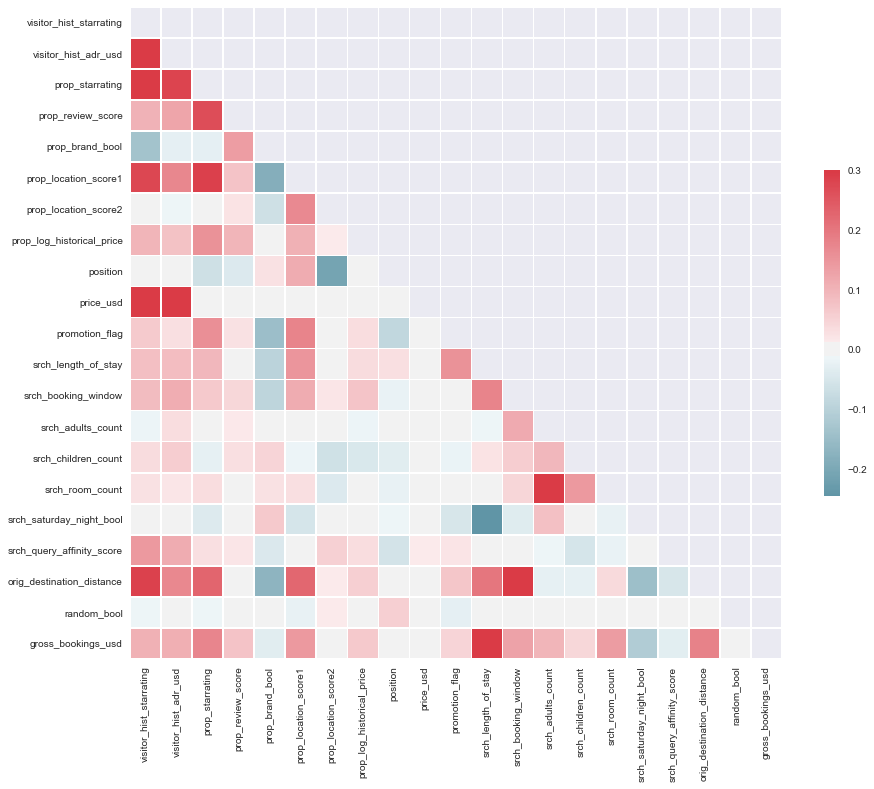

In [54]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==1][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print(corr.prop_location_score1)
print(corr)

### Only instances without booking 

                           visitor_hist_starrating  visitor_hist_adr_usd  \
visitor_hist_starrating                   1.000000              0.498315   
visitor_hist_adr_usd                      0.498315              1.000000   
prop_starrating                           0.290378              0.149634   
prop_review_score                        -0.003791              0.044127   
prop_brand_bool                          -0.185078             -0.058345   
prop_location_score1                      0.249923              0.151670   
prop_location_score2                      0.057188              0.037815   
prop_log_historical_price                 0.058891              0.033083   
position                                 -0.015291             -0.015900   
price_usd                                 0.170254              0.180947   
promotion_flag                            0.084277              0.046581   
srch_length_of_stay                       0.077095              0.085194   
srch_booking

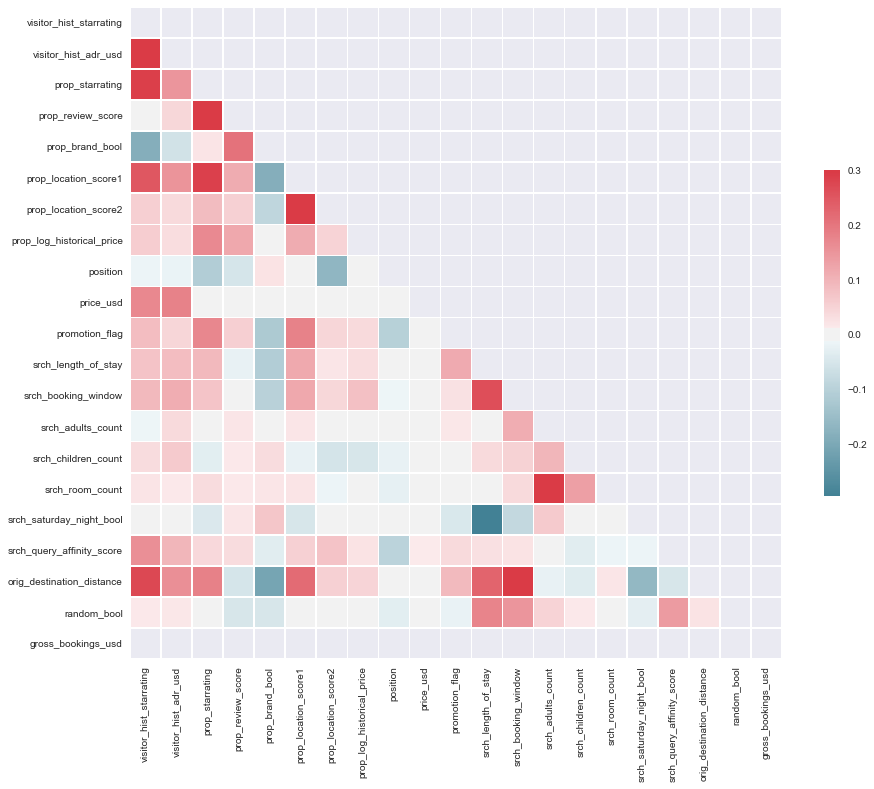

In [69]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==0][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print(corr)

### Difference in correlations between booked and not booked 

                           visitor_hist_starrating  visitor_hist_adr_usd  \
visitor_hist_starrating                   0.000000              0.008346   
visitor_hist_adr_usd                      0.008346              0.000000   
prop_starrating                           0.179549              0.132861   
prop_review_score                         0.108004              0.080380   
prop_brand_bool                           0.052041              0.031034   
prop_location_score1                      0.027311              0.022255   
prop_location_score2                     -0.050269             -0.049644   
prop_log_historical_price                 0.040714              0.043710   
position                                  0.015571              0.012723   
price_usd                                 0.195642              0.219252   
promotion_flag                           -0.018683             -0.016169   
srch_length_of_stay                       0.005176              0.001606   
srch_booking

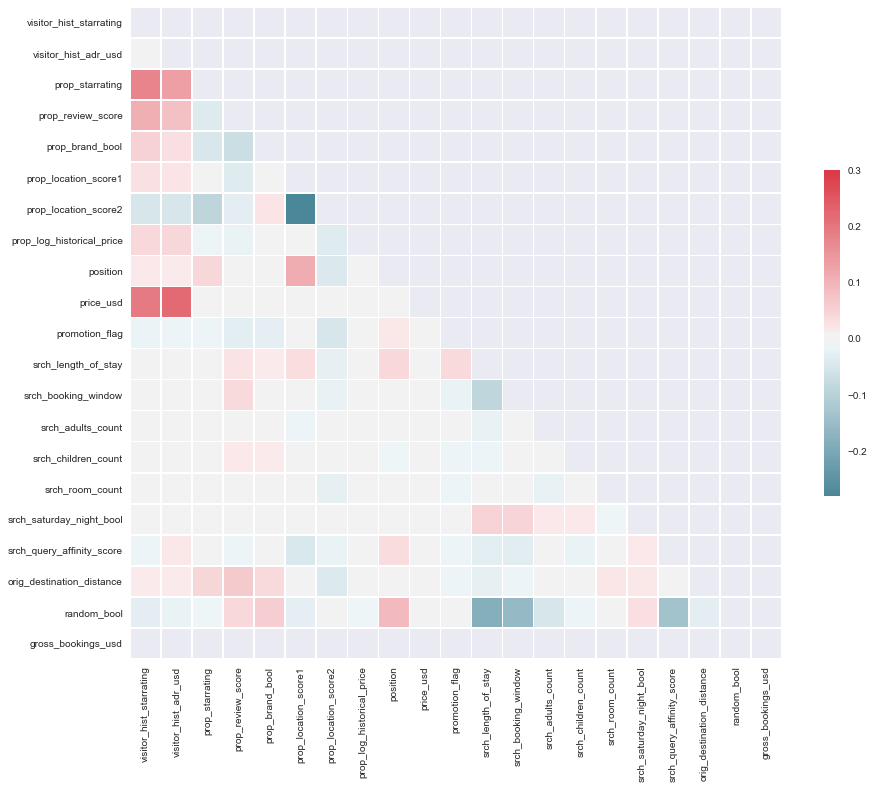

In [68]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr1 = train[train.booking_bool==1][numerical_data_of_interest].corr()
corr2 = train[train.booking_bool==0][numerical_data_of_interest].corr()
corr = corr1-corr2

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print(corr)

In [38]:
train[['promotion_flag','booking_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,promotion_flag,booking_bool
1,1,0.039235
0,0,0.024797


In [39]:
train[['promotion_flag','click_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,promotion_flag,click_bool
1,1,0.060301
0,0,0.040473


In [40]:
train[['prop_brand_bool','booking_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_brand_bool,booking_bool
1,1,0.029159
0,0,0.025741


In [41]:
train[['prop_brand_bool','click_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,prop_brand_bool,click_bool
1,1,0.044884
0,0,0.044513


In [133]:
train[['random_bool','click_bool']].groupby(['random_bool'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,random_bool,click_bool
1,1,0.046604
0,0,0.043969


In [134]:
train[['random_bool','booking_bool']].groupby(['random_bool'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,random_bool,booking_bool
0,0,0.037402
1,1,0.005325


In [42]:
train[['booking_bool','click_bool','promotion_flag','prop_brand_bool']].corr()

,booking_bool,click_bool,promotion_flag,prop_brand_bool
booking_bool,1.000000,0.782889,0.036047,0.009991
click_bool,0.782889,1.000000,0.039440,0.000866
promotion_flag,0.036047,0.039440,1.000000,-0.118841
prop_brand_bool,0.009991,0.000866,-0.118841,1.000000


In [43]:
# what features might be used to model 'position'?
train[['position','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score2','promotion_flag','srch_query_affinity_score']].corr()

,position,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score2,promotion_flag,srch_query_affinity_score
position,1.000000,-0.107717,-0.053983,0.023419,-0.174955,-0.103621,-0.094887
prop_starrating,-0.107717,1.000000,0.306454,0.021329,0.086325,0.173732,0.041781
prop_review_score,-0.053983,0.306454,1.000000,0.203949,0.055063,0.057970,0.035633
prop_brand_bool,0.023419,0.021329,0.203949,1.000000,-0.085203,-0.118841,-0.034613
prop_location_score2,-0.174955,0.086325,0.055063,-0.085203,1.000000,0.045440,0.075046
promotion_flag,-0.103621,0.173732,0.057970,-0.118841,0.045440,1.000000,0.038488
srch_query_affinity_score,-0.094887,0.041781,0.035633,-0.034613,0.075046,0.038488,1.000000


In [44]:
train[train.booking_bool==1][['position','prop_location_score1']].corr()

,position,prop_location_score1
position,1.000000,0.114018
prop_location_score1,0.114018,1.000000


In [45]:
train[train.booking_bool==1][['position','prop_location_score2']].corr()

,position,prop_location_score2
position,1.000000,-0.209136
prop_location_score2,-0.209136,1.000000


In [46]:
train[['booking_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_id,booking_bool
115035,125451,1.0
14783,16052,1.0
87447,95374,1.0
87440,95366,1.0
68591,74748,1.0
87362,95278,1.0
40191,43764,1.0
114802,125197,1.0
125888,137314,1.0
80521,87784,1.0


In [47]:
train[['site_id','price_usd']].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

,site_id,price_usd
25,26,909.176225
14,15,420.221795
33,34,275.636706
4,5,269.044141
31,32,268.459679
11,12,263.577263
27,28,186.302246
22,23,185.730583
13,14,184.203234
3,4,179.449536


In [136]:
avg_price_per_site = train[['site_id','price_usd']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

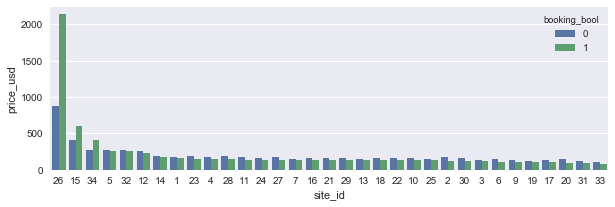

In [137]:
#avg_price_per_site.plot.bar(x='site_id',y='price_usd', figsize=(8,3), legend=None, grid='on')
sns.set()
#sns.set_style("whitegrid")
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='booking_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','booking_bool']], ci=None)
plt.ylabel('price_usd')
#plt.title('mean price_usd of booked and not-booked hotels per site_id')
plt.savefig("output/correlation_price_usd_per_site_id.pdf", bbox_inches='tight')
plt.show()

In [50]:
avg_review_per_site = train[['site_id','prop_review_score']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='prop_review_score',ascending=False)

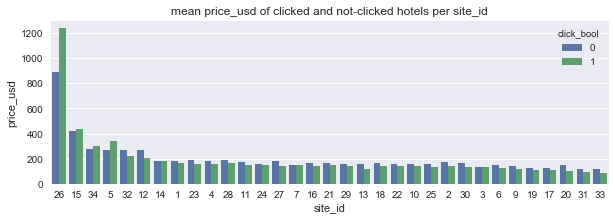

In [51]:
sns.set()
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='click_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','click_bool','booking_bool']], ci=None)
plt.ylabel('price_usd')
plt.title('mean price_usd of clicked and not-clicked hotels per site_id')
plt.savefig("output/correlation_price_usd_per_site_id(clicked).png", bbox_inches='tight')
plt.show()

/Users/Tamika/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


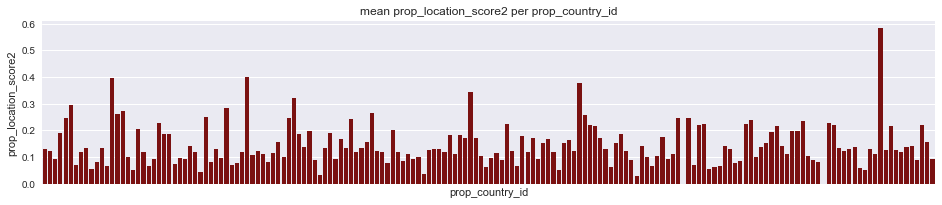

In [52]:
sns.set()
plt.figure(figsize=(16,3))
sns.barplot(x='prop_country_id', y='prop_location_score2', data=train[['prop_country_id','prop_location_score2']], ci=None, color='darkred')
plt.ylabel('prop_location_score2')
plt.xticks([])
plt.title('mean prop_location_score2 per prop_country_id')
plt.savefig("output/correlation_prop_location_per_country_id.png", bbox_inches='tight')
plt.show()

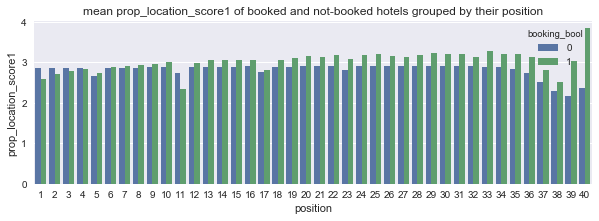

In [12]:
sns.set()
plt.figure(figsize=(10,3))
sns.barplot(x='position', y='prop_location_score1', hue='booking_bool', data=train[['position','prop_location_score1','booking_bool']], ci=None)
plt.ylabel('prop_location_score1')
plt.title('mean prop_location_score1 of booked and not-booked hotels grouped by their position')
plt.show()

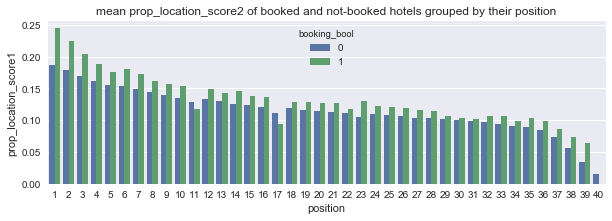

In [13]:
sns.set()
plt.figure(figsize=(10,3))
sns.barplot(x='position', y='prop_location_score2', hue='booking_bool', data=train[['position','prop_location_score2','booking_bool']], ci=None)
plt.ylabel('prop_location_score1')
plt.title('mean prop_location_score2 of booked and not-booked hotels grouped by their position')
plt.show()

In [53]:
train[['visitor_location_country_id','prop_location_score2']].groupby(['visitor_location_country_id'], as_index=False).mean().std()

visitor_location_country_id    67.633302
prop_location_score2            0.061563
dtype: float64

In [54]:
train[['srch_destination_id','prop_location_score2']].groupby(['srch_destination_id'], as_index=False).mean().std()

srch_destination_id     8222.365409
prop_location_score2       0.219969
dtype: float64

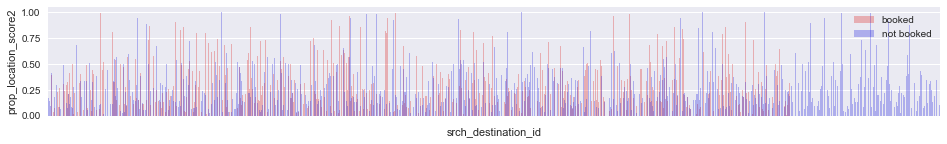

In [141]:
sns.set()
plt.figure(figsize=(16,2))
ax = sns.barplot(x='srch_destination_id', y='prop_location_score2', data=train[['srch_destination_id','prop_location_score2']][train.booking_bool==1], ci=None, color='red', alpha=0.3, label='booked')
sns.barplot(x='srch_destination_id', y='prop_location_score2', data=train[['srch_destination_id','prop_location_score2']][train.booking_bool==0], ci=None, color='blue', alpha=0.3, label='not booked')
plt.ylabel('prop_location_score2')
#plt.xticks([])
ax.set_xticklabels([])
plt.legend()
#plt.title('mean prop_location_score2 per srch_destination_id')
plt.savefig("output/correlation_prop_location_score2_per_srch_destination_id.pdf", bbox_inches='tight')
plt.show()

In [15]:
train['star_diff'] = np.abs(train.visitor_hist_starrating - train.prop_starrating)

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


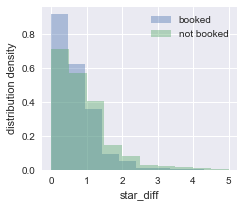

In [126]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.star_diff[train.booking_bool == 1].dropna(), kde=False, norm_hist=True, label='booked', bins=10)
sns.distplot(train.star_diff[train.booking_bool == 0].dropna(), kde=False, norm_hist=True, label='not booked', bins=10)
plt.legend()
plt.ylabel('distribution density')
plt.savefig("output/correlation_bookingbool_star_diff.pdf", bbox_inches='tight')

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


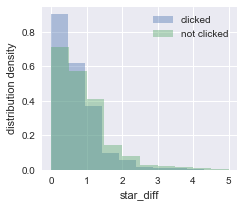

In [21]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.star_diff[train.click_bool == 1].dropna(), kde=False, norm_hist=True, label='clicked', bins=10)
sns.distplot(train.star_diff[train.click_bool == 0].dropna(), kde=False, norm_hist=True, label='not clicked', bins=10)
plt.legend()
plt.ylabel('distribution density')
plt.savefig("output/correlation_clickbool_star_diff.png", bbox_inches='tight')

In [59]:
train['star_diff_bins'] = pd.cut(train.star_diff, 5)
train[['star_diff_bins','booking_bool']].groupby(['star_diff_bins'], as_index=False).mean().sort_values(by='star_diff_bins',ascending=True)

,star_diff_bins,booking_bool
0,"(-0.005, 1.0]",0.040379
1,"(1.0, 2.0]",0.024990
2,"(2.0, 3.0]",0.016264
3,"(3.0, 4.0]",0.016580
4,"(4.0, 5.0]",0.018111


In [22]:
train[['star_diff','booking_bool']].dropna().corr()

,star_diff,booking_bool
star_diff,1.000000,-0.044437
booking_bool,-0.044437,1.000000


c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


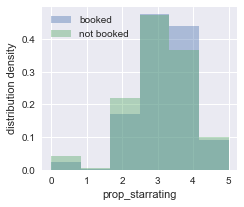

In [71]:
sns.set(style="darkgrid")
plt.figure(figsize=(3.5,3))
sns.distplot(train.prop_starrating[train.booking_bool==1].dropna(), bins=6, kde=False, norm_hist=True, label='booked')
sns.distplot(train.prop_starrating[train.booking_bool==0].dropna(), bins=6, kde=False, norm_hist=True, label='not booked')
plt.legend()
plt.ylabel('distribution density')
#plt.savefig("output/distribution_prop_starrating.pdf", bbox_inches='tight')
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


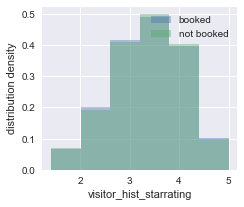

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(3.5,3))
sns.distplot(train.visitor_hist_starrating[train.booking_bool==1].dropna(), bins=6, kde=False, norm_hist=True, label='booked')
sns.distplot(train.visitor_hist_starrating[train.booking_bool==0].dropna(), bins=6, kde=False, norm_hist=True, label='not booked')
plt.legend()
plt.ylabel('distribution density')
#plt.savefig("output/distribution_visitor_hist_starrating.pdf", bbox_inches='tight')
plt.show()

In [24]:
train['price_diff'] = np.abs(train.visitor_hist_adr_usd - train.price_usd)

In [1]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.price_diff[train.booking_bool == 1].dropna().apply(lambda x: x if x <= 600 else 600), kde=False, norm_hist=True, bins=10, label='booked')
sns.distplot(train.price_diff[train.booking_bool == 0].dropna().apply(lambda x: x if x <= 600 else 600), kde=False, norm_hist=True, bins=10, label='not booked')
#plt.title('booking_bool = 1')
plt.legend()
plt.savefig("output/correlation_bookingbool_price_diff.pdf", bbox_inches='tight')

NameError: name 'sns' is not defined

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


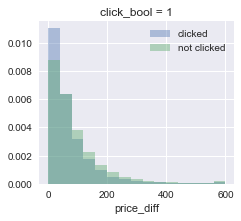

In [33]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.price_diff[train.click_bool == 1].dropna().apply(lambda x: x if x <= 600 else 600), kde=False, norm_hist=True, bins=15, label='clicked')
sns.distplot(train.price_diff[train.click_bool == 0].dropna().apply(lambda x: x if x <= 600 else 600), kde=False, norm_hist=True, bins=15, label='not clicked')
plt.title('click_bool = 1')
plt.legend()
plt.savefig("output/correlation_clickbool_price_diff.png", bbox_inches='tight')

In [73]:
train[['price_diff','booking_bool']].dropna().corr()

,price_diff,booking_bool
price_diff,1.000000,-0.032355
booking_bool,-0.032355,1.000000


In [34]:
train.price_diff[train.booking_bool==1].dropna().describe()

count    9134.000000
mean       71.178742
std        92.681850
min         0.000000
25%        19.400000
50%        44.850000
75%        89.860000
max      1849.700000
Name: price_diff, dtype: float64

In [35]:
train.price_diff[train.booking_bool==0].dropna().describe()

count    243854.000000
mean         92.749882
std         125.337081
min           0.000000
25%          27.550000
50%          61.380000
75%         117.420000
max       12787.110000
Name: price_diff, dtype: float64

In [36]:
train.star_diff[train.booking_bool==1].dropna().describe()

count    9088.000000
mean        0.640426
std         0.603991
min         0.000000
25%         0.210000
50%         0.500000
75%         1.000000
max         4.800000
Name: star_diff, dtype: float64

In [37]:
train.star_diff[train.booking_bool==0].dropna().describe()

count    242778.000000
mean          0.816898
std           0.744501
min           0.000000
25%           0.290000
50%           0.650000
75%           1.030000
max           5.000000
Name: star_diff, dtype: float64

In [38]:
train['price_diff_bins'] = pd.qcut(train['price_diff'], 10)
train[['price_diff_bins','booking_bool']].groupby(['price_diff_bins'], as_index=False).mean().sort_values(by='price_diff_bins',ascending=True)

,price_diff_bins,booking_bool
0,"(-0.001, 10.5]",0.051614
1,"(10.5, 21.53]",0.047233
2,"(21.53, 33.14]",0.043961
3,"(33.14, 46.06]",0.040850
4,"(46.06, 60.72]",0.036062
5,"(60.72, 78.35]",0.034109
6,"(78.35, 101.499]",0.031989
7,"(101.499, 135.126]",0.027353
8,"(135.126, 199.11]",0.026045
9,"(199.11, 12787.11]",0.021822


In [39]:
train[['prop_starrating','booking_bool']].groupby(['prop_starrating'], as_index=False).mean().sort_values(by='prop_starrating',ascending=False)

,prop_starrating,booking_bool
5,5,0.025915
4,4,0.033223
3,3,0.028090
2,2,0.021844
1,1,0.013314
0,0,0.016506


In [3]:
train['prop_location_score_combined'] = (train.prop_location_score1 / train.prop_location_score1.mean()) - np.log(train.prop_location_score2 + 0.00001)/np.mean(np.log(train.prop_location_score2 + 0.000001))

In [4]:
train[['prop_location_score_combined','booking_bool']].corr()

,prop_location_score_combined,booking_bool
prop_location_score_combined,1.000000,0.032843
booking_bool,0.032843,1.000000


c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


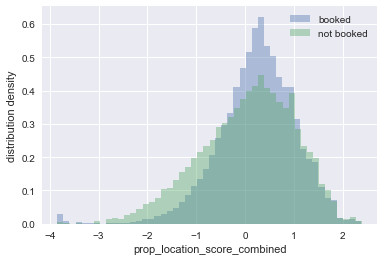

In [5]:
sns.set(style="darkgrid")
#plt.figure(figsize=(3.5,3))
sns.distplot(train.prop_location_score_combined[train.booking_bool==1].dropna(), kde=False, norm_hist=True, label='booked')
sns.distplot(train.prop_location_score_combined[train.booking_bool==0].dropna(), kde=False, norm_hist=True, label='not booked')
plt.legend()
plt.ylabel('distribution density')
#plt.savefig("output/distribution3_srch_query_affinity_score.pdf", bbox_inches='tight')
plt.show()

In [6]:
train[['prop_location_score_combined', 'prop_location_score2', 'booking_bool', 'position']].corr()

,prop_location_score_combined,prop_location_score2,booking_bool,position
prop_location_score_combined,1.000000,0.681215,0.032843,-0.102839
prop_location_score2,0.681215,1.000000,0.066405,-0.174955
booking_bool,0.032843,0.066405,1.000000,-0.147918
position,-0.102839,-0.174955,-0.147918,1.000000


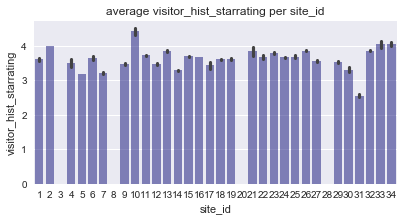

In [127]:
plt.figure(figsize=(6.5,3))
sns.barplot(x='site_id', y='visitor_hist_starrating', data=train[['site_id','visitor_hist_starrating','booking_bool']], color='darkblue', alpha=0.5)
plt.title('average visitor_hist_starrating per site_id')
plt.savefig("output/correlation_visitor_hist_starrating_per_site_id.pdf", bbox_inches='tight')

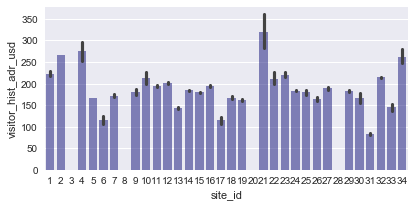

In [138]:
plt.figure(figsize=(6.5,3))
sns.barplot(x='site_id', y='visitor_hist_adr_usd', data=train[['site_id','visitor_hist_adr_usd','booking_bool']], color='darkblue', alpha=0.5)
#plt.title('average visitor_hist_adr_usd per site_id')
plt.savefig("output/correlation_visitor_hist_adr_usd_per_site_id.pdf", bbox_inches='tight')

In [131]:
train[['position','prop_id']].groupby('prop_id').mean().std()

position    6.630014
dtype: float64

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'distribution density')

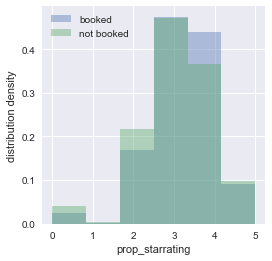

In [8]:
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(train.prop_starrating[train.booking_bool==1].dropna(), bins=6, kde=False, norm_hist=True, label='booked')
sns.distplot(train.prop_starrating[train.booking_bool==0].dropna(), bins=6, kde=False, norm_hist=True, label='not booked')
plt.legend()
plt.ylabel('distribution density')

In [10]:
features = ['site_id','visitor_location_country_id','prop_country_id','srch_destination_id','visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
mi = mutual_info_classif(train_sample[features].fillna(-1), train_sample.booking_bool)

In [13]:
pd.DataFrame({'feature':features, 'mutual_info':mi}).sort_values(by='mutual_info', ascending=False)

,feature,mutual_info
24,gross_bookings_usd,0.136223
4,visitor_hist_starrating,0.094564
19,srch_room_count,0.088540
17,srch_adults_count,0.055789
8,prop_brand_bool,0.046963
2,prop_country_id,0.042843
21,srch_query_affinity_score,0.041611
1,visitor_location_country_id,0.039240
6,prop_starrating,0.032304
7,prop_review_score,0.031307
